## Part 1: Showing two exponential functions are proportional

See screenshot in repository or through the link:
https://github.com/javmencia/STA365javierMencia/blob/bb8603f8bbfd7415710a3d26eba4f22d71d025e0/Screenshot%202024-01-23%20095421.png

# Part 2

## 1. Make the "Classic Bayes" figure, but instead of a single likelihood, plot the individual likelihoods of each observation. Hint: Consider the code...

for xi in range(x):
    print(xi)

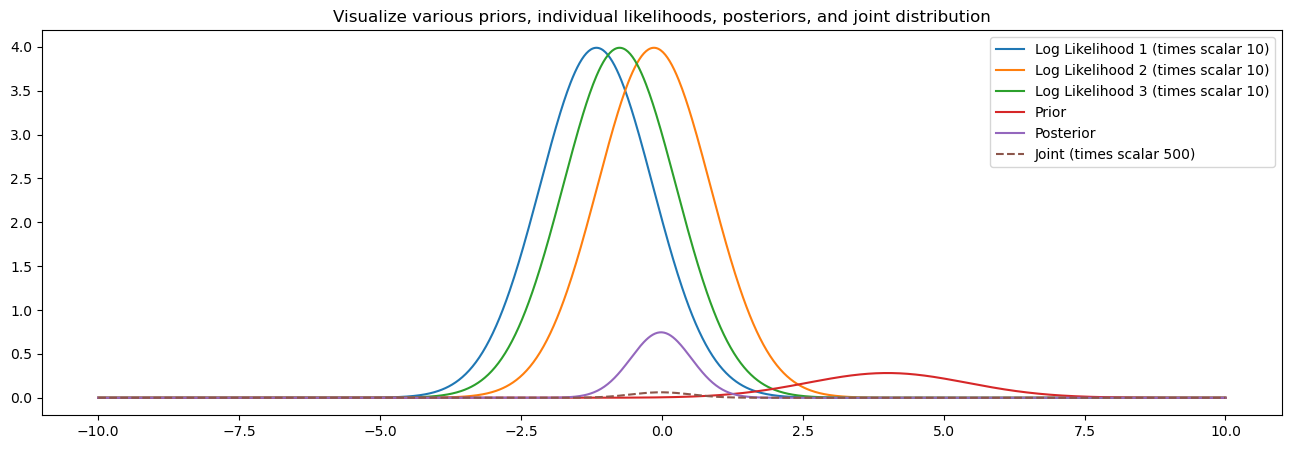

In [1]:
#Classic Bayes Figure with individual likelihoods

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

n = 3
x = stats.norm(loc=0, scale=1).rvs(n)
theta_0, tau = 4, 1/2
parameter_domain = np.linspace(-10, 10, 1001)

# Individual likelihoods for each observation
likelihoods = np.array([stats.norm.pdf(x_i, loc=parameter_domain, scale=1) for x_i in x])
product_likelihoods = np.prod(likelihoods, axis=0)

prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)

c, c2 = 500, 10
joint = c * product_likelihoods * prior
posterior = stats.norm(loc=(tau*theta_0 + x.sum())/(tau + n), scale=1/(tau + n)**0.5).pdf(parameter_domain)

# Plotting
plt.figure(figsize=(16, 5))
for i in range(n):
    plt.plot(parameter_domain, c2 * likelihoods[i], label=f"Log Likelihood {i+1} (times scalar {c2})")

plt.plot(parameter_domain, prior, label="Prior")
plt.plot(parameter_domain, posterior, label="Posterior")
plt.plot(parameter_domain, joint, linestyle="--", label=f"Joint (times scalar {c})")
plt.legend()
plt.title("Visualize various priors, individual likelihoods, posteriors, and joint distribution")
plt.show()


## 2. Make the "Classic Bayes" figure for the normal-normal model on a log scale. Hint: plot loglikehood, prior logpdf, and the log of the joint distribution using stats.norm.logpdf()

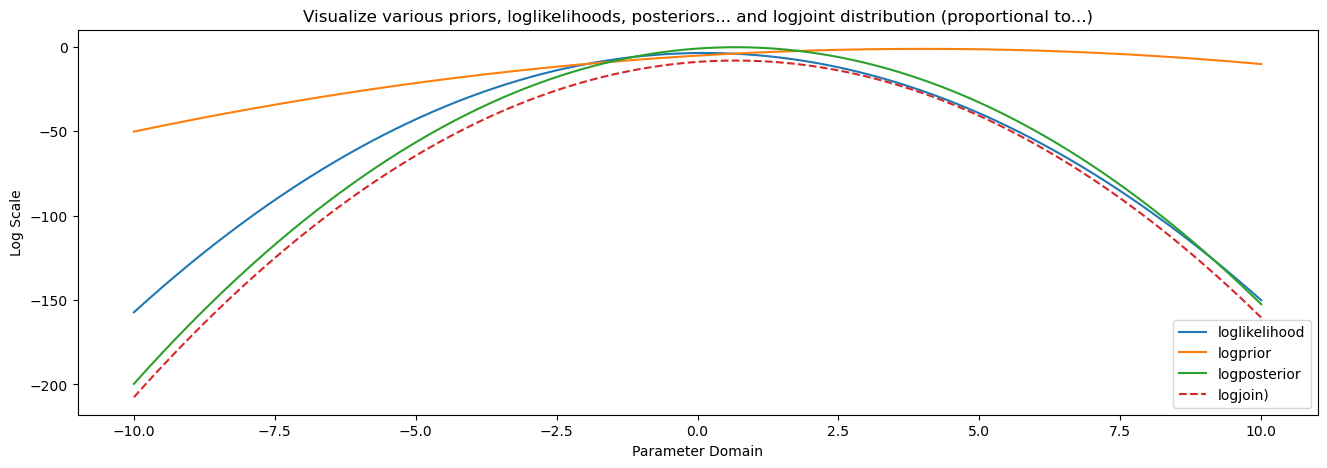

In [6]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

#Initialising parameters
n = 3
x = stats.norm(loc=0, scale=1).rvs(n)
theta_0, tau = 4, 1/2
parameter_domain = np.linspace(-10, 10, 1001)

# Computing loglikelihood using stats.norm.logepdf
loglikelihood = np.sum(stats.norm.logpdf(x[:, np.newaxis], loc=parameter_domain, scale=1), axis=0)

# Computing logprior 
logprior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain)

# Scaling constants
c, c2 = 500, 10

# Computing logjoint
logjoint = loglikelihood + logprior

# Compute logposterior on a log scale
logposterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).logpdf(parameter_domain)

# Plot the figure
plt.figure(figsize=(16, 5))
plt.plot(parameter_domain, loglikelihood, label="loglikelihood")
plt.plot(parameter_domain, logprior, label="logprior")
plt.plot(parameter_domain, logposterior, label="logposterior")
plt.plot(parameter_domain, logjoint, linestyle="--", label="logjoin)")
plt.legend()
plt.title("Classic Bayes figure for Normal-Normal model on log scale")
plt.xlabel("Parameter Domain")
plt.ylabel("Log Scale")
plt.show()


## 3. What is the ***posterior distribution*** of a **normal likelihood** with $p(\theta) \propto 1$?

We know $p(x|\theta)= N(\theta, \sigma ^2)$

Also by Bayes Rule, $p(x|\theta)= \frac{p(\theta|x)p(\theta)}{p(x)}$ but we are given that $p(\theta) \propto 1$

So $p(x|\theta) \propto p(\theta|x) $

$\implies p(\theta |x) \propto N(\theta, \sigma ^2)$

Hence up to a normalising constant, the posterior will stay a normal distribution with the same mean and variance as the likelihood, namely $\theta$ and $\sigma^2$



## 4. How do log likelihoods and posteriors differ from each other as a result of improper priors pdiscussed below] and marginal likelihood constants?

The log likelihood quantifies the likelihood of observing the data x given a particular parameter $\theta$. It is concerned with the fit of the data to the model and is not directly influenced by the properties of the prior

The posterior distribution represents the updated belief about the parameter $\theta$ after considering both the likelihood and prior. The marginal likelihood ensures that the even if the prior is improper, the posterior is a proper probability distribution

In terms of marginal likelihoods, they differ by the log of it